In [19]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding
from keras.layers import SpatialDropout1D, Conv1D, GlobalMaxPooling1D # new! 
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [15]:
# training:
epochs = 4
batch_size = 128

# vector-space embedding: 
n_dim = 64
n_unique_words = 5000 
max_review_length = 400
pad_type = trunc_type = 'pre'
drop_embed = 0.2 # new!

# convolutional layer architecture:
n_conv = 256 # filters, a.k.a. kernels
k_conv = 3 # kernel length

# dense layer architecture: 
n_dense = 256
dropout = 0.2

In [16]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words) # removed n_words_to_skip


x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [20]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(Conv1D(n_conv, k_conv, activation='relu'))
# model.add(Conv1D(n_conv, k_conv, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 400, 64)           320000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 400, 64)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 398, 256)          49408     
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
modelcheckpoint = ModelCheckpoint(filepath="/weights_conv.{epoch:02d}.hdf5")

In [24]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 98s 491ms/step - loss: 0.6212 - accuracy: 0.6132 - val_loss: 0.3053 - val_accuracy: 0.8705
Epoch 2/4
196/196 [==============================] - 96s 490ms/step - loss: 0.2620 - accuracy: 0.8957 - val_loss: 0.2600 - val_accuracy: 0.8910
Epoch 3/4
196/196 [==============================] - 96s 489ms/step - loss: 0.1748 - accuracy: 0.9334 - val_loss: 0.2877 - val_accuracy: 0.8828
Epoch 4/4
196/196 [==============================] - 96s 491ms/step - loss: 0.1148 - accuracy: 0.9610 - val_loss: 0.3263 - val_accuracy: 0.8812


In [25]:
model.load_weights("/weights_conv.04.hdf5") # zero-indexed

In [26]:
y_hat = model.predict_proba(x_valid)

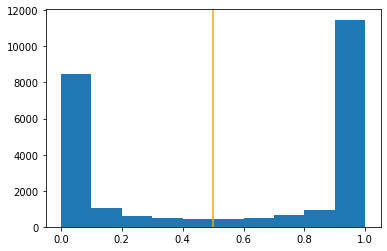

In [27]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [28]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'95.76'